Выполнить предсказание временного ряда. <br>
Разделить нужно не смешивая прошлое и будущее. <br>
Использовать sarima /  Prophet? <br>
docker / собрать контейнер с tf + добавить свои данные <br>
Electric_Production


In [177]:
# reset if necessary
%reset

Nothing done.


In [178]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = 12, 10
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import product

In [179]:
import pmdarima

In [180]:
pmdarima.__version__

'2.0.4'

In [181]:
dataset = pd.read_csv('Electric_Production.csv', index_col=['DATE'], parse_dates=['DATE'])
dataset.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


Извлекаем даты из датафрейма в отдельный ряд данных. Пригодится для построения графиков.

In [198]:
dates_series = pd.Series(dataset.index).to_numpy()

In [199]:
dates_series

array(['1985-01-01T00:00:00.000000000', '1985-02-01T00:00:00.000000000',
       '1985-03-01T00:00:00.000000000', '1985-04-01T00:00:00.000000000',
       '1985-05-01T00:00:00.000000000', '1985-06-01T00:00:00.000000000',
       '1985-07-01T00:00:00.000000000', '1985-08-01T00:00:00.000000000',
       '1985-09-01T00:00:00.000000000', '1985-10-01T00:00:00.000000000',
       '1985-11-01T00:00:00.000000000', '1985-12-01T00:00:00.000000000',
       '1986-01-01T00:00:00.000000000', '1986-02-01T00:00:00.000000000',
       '1986-03-01T00:00:00.000000000', '1986-04-01T00:00:00.000000000',
       '1986-05-01T00:00:00.000000000', '1986-06-01T00:00:00.000000000',
       '1986-07-01T00:00:00.000000000', '1986-08-01T00:00:00.000000000',
       '1986-09-01T00:00:00.000000000', '1986-10-01T00:00:00.000000000',
       '1986-11-01T00:00:00.000000000', '1986-12-01T00:00:00.000000000',
       '1987-01-01T00:00:00.000000000', '1987-02-01T00:00:00.000000000',
       '1987-03-01T00:00:00.000000000', '1987-04-01

In [183]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

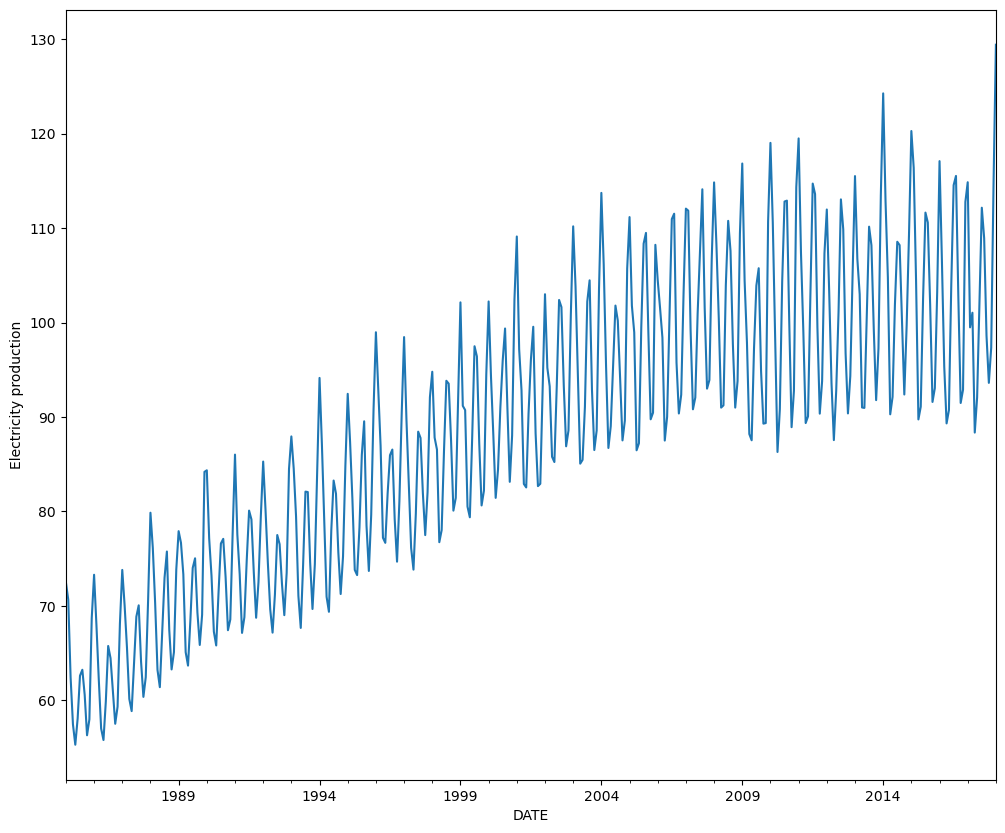

In [184]:
dataset.rename(columns={'IPG2211A2N': 'electr_prod'}, inplace=True)
dataset['electr_prod'].plot()
plt.ylabel('Electricity production')
plt.show()

Plot several years on a single figure to check monthly seasonality 

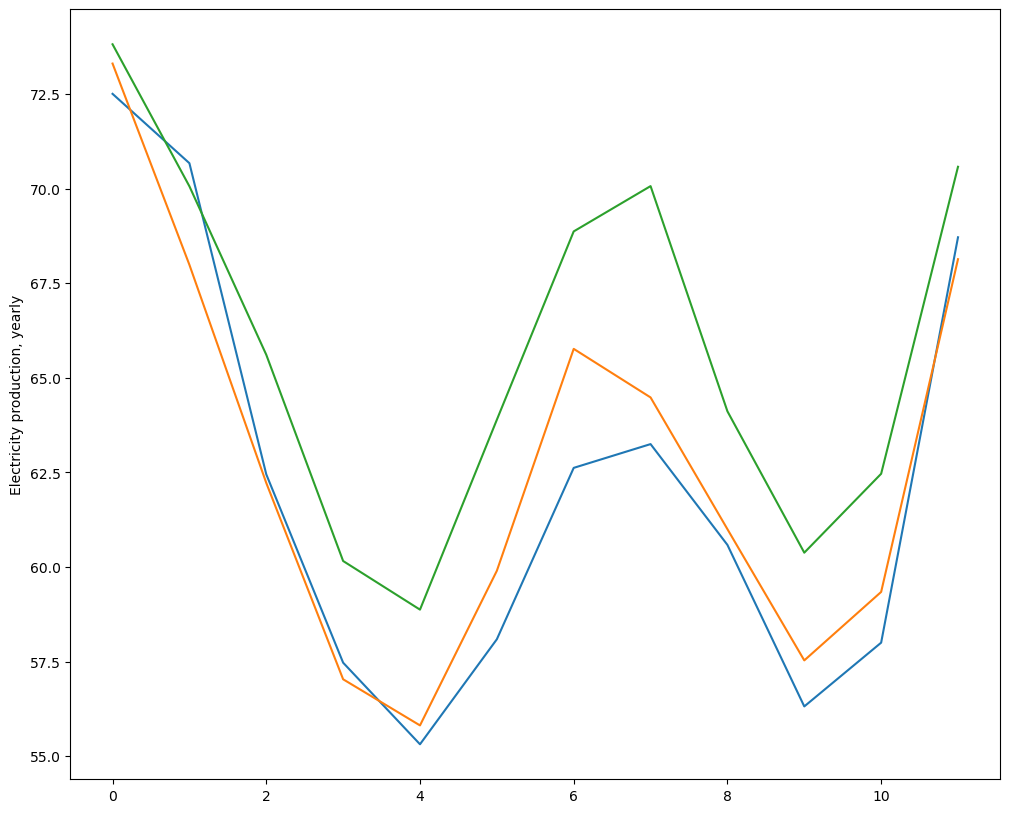

In [185]:
y1 = dataset['electr_prod'][0:12].to_numpy()
y2 = dataset['electr_prod'][12:12*2].to_numpy()
y3 = dataset['electr_prod'][12*2:12*3].to_numpy()
x = range(0,12)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.ylabel('Electricity production, yearly')
# plt.ylim(50,80) # afterall check automatic setting limits
plt.show()

In [187]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
# model = pm.auto_arima(dataset['electr_prod'].to_numpy().astype(np.int32)[:-24*7*10], seasonal=True, m=24*7)
model = auto_arima(dataset,
                   seasonal=True,   # Set to True if your data has seasonal patterns
                   m=12,            # Seasonal frequency (e.g., 12 for monthly data)
                   stepwise=True,   # Use stepwise algorithm for faster fitting
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1953.737, Time=1.02 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2750.050, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2401.309, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2748.185, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.09 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=1955.703, Time=3.03 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=2.98 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=2016.242, Time=2.44 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=1986.171, Time=2.64 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=5.75 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=1866.574, Time=1.14 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2265.6

In [188]:
# forecast horizon
years_horizon = 5
forecast_horizon = years_horizon * 12
# make forecasts
forecasts = model.predict(forecast_horizon)  # predict fore_horizon steps into the future

In [189]:
forecasts.shape

(60,)

In [203]:
from datetime import date
sdate = date(2018,2,1)   # start date
edate = date(2018 + years_horizon, 1, 1)   # end date
dates_new = pd.date_range(sdate, edate, freq='MS').to_numpy()

In [206]:
x = np.concatenate([dates_series, dates_new])

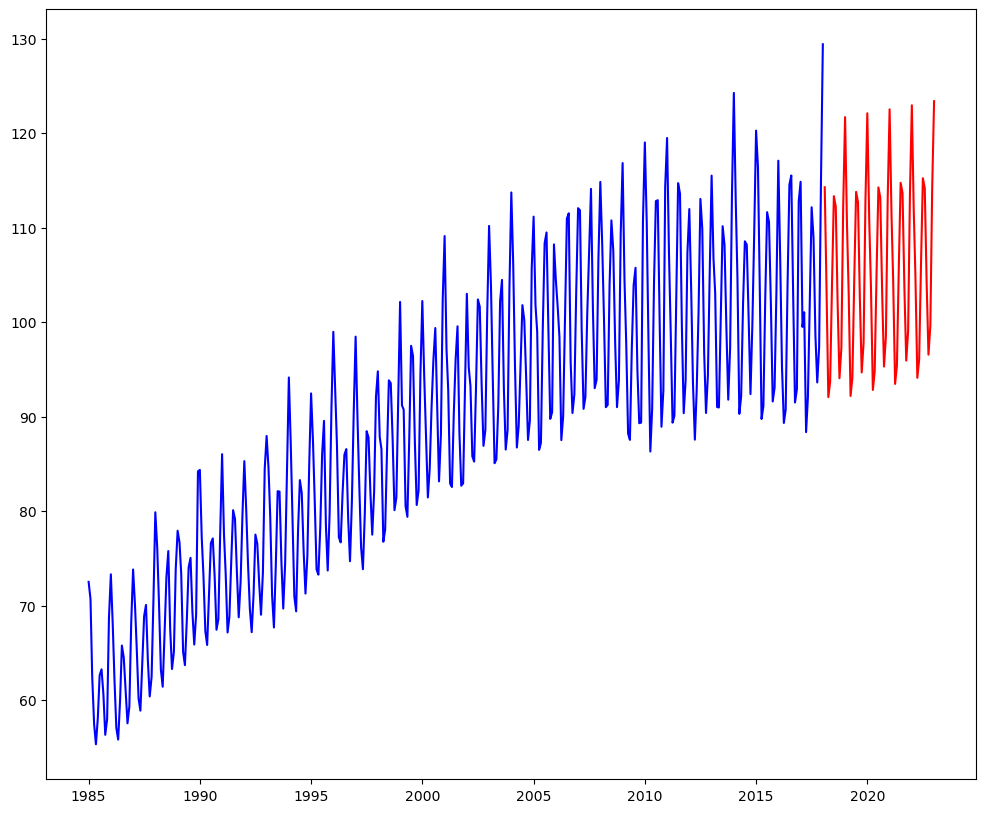

In [ ]:
# Visualize the forecasts (blue => train, red => forecasts)

plt.plot(x[:len(dataset.to_numpy().reshape(-1))], dataset.to_numpy().reshape(-1), c='blue')
plt.plot(x[len(dataset.to_numpy().reshape(-1)):], forecasts, c='red')
plt.show()

---

In [ ]:
# import os
# os.environ['CMDSTAN'] = "C:\\Users\\wmamantw\\AppData\\Local\\anaconda3\\envs\\torch\\Library\\bin\\cmdstan"

In [214]:
from prophet import Prophet
import pandas as pd

In [215]:
dataset_1 = pd.read_csv('Electric_Production.csv')

In [216]:
dataset_1.columns = ['ds', 'y']

In [217]:
dataset_1.head()

,ds,y
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [218]:
df = dataset_1

In [219]:
df.columns = ['ds', 'y']

In [222]:
train_df = df[:]

In [223]:
m = Prophet(interval_width = 0.95)
m.fit(train_df)

20:50:13 - cmdstanpy - INFO - Chain [1] start processing
20:50:13 - cmdstanpy - INFO - Chain [1] done processing


In [224]:
future = m.make_future_dataframe(periods = forecast_horizon, freq = 'M')
future.tail()

,ds
452,2022-08-31
453,2022-09-30
454,2022-10-31
455,2022-11-30
456,2022-12-31


In [226]:
train_df.head()

,ds,y
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [227]:
train_df.tail()

,ds,y
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212
396,1/1/2018,129.4048


In [228]:
future

,ds
0,1985-01-01
1,1985-02-01
2,1985-03-01
3,1985-04-01
4,1985-05-01
...,...
452,2022-08-31
453,2022-09-30
454,2022-10-31
455,2022-11-30


In [229]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
452,2022-08-31,103.212167,97.497739,108.996495
453,2022-09-30,96.180706,89.993819,101.586516
454,2022-10-31,98.348483,92.747090,104.293750
455,2022-11-30,107.273925,101.418332,112.963964
456,2022-12-31,119.216668,113.355556,124.528596


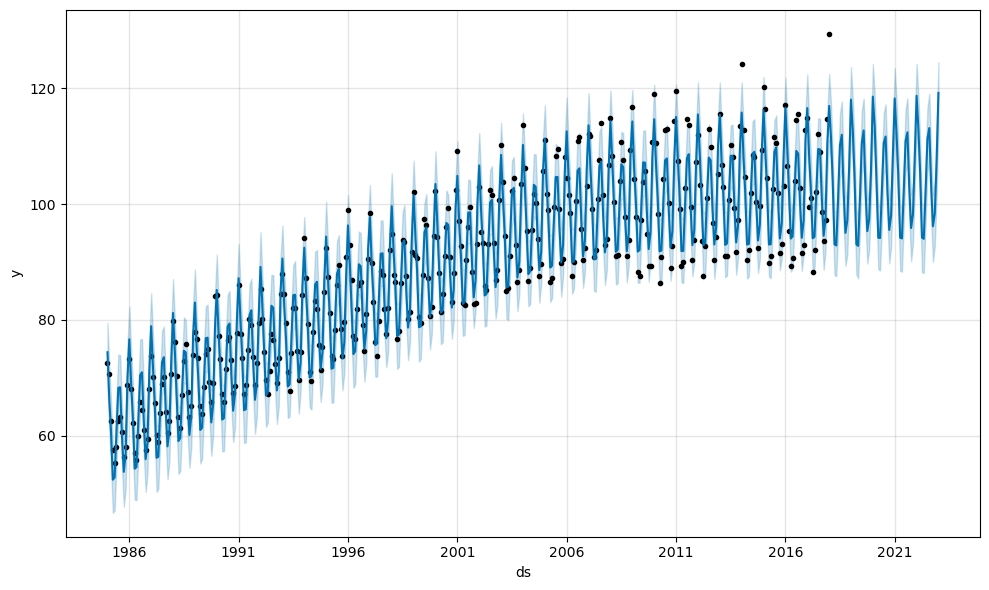

In [230]:
m.plot(forecast)

In [231]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_squared_error(df['y'][-24*7:], forecast['yhat'][-24*7:].astype(int)))
print(mean_absolute_error(df['y'][-24*7:], forecast['yhat'][-24*7:].astype(int)))

14.589497713750001
3.117635119047619


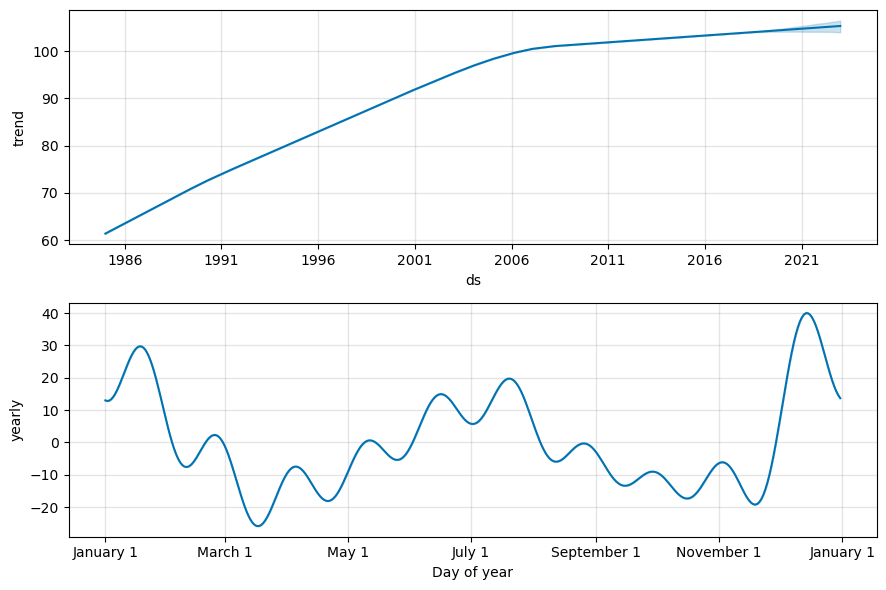

In [232]:
m.plot_components(forecast)

---

Выводы: <br>
Проведено изучение временных рядов на основе датасета Electric Production. <br>
С помощью библотек sarima и Prophet получено предсказание временного ряда на будущий период (5 лет). <br>
Обе модели дают близкие предсказания. <br>
С помощью модели Prophet оценили метрики (среднюю абсолютную и среднеквадратичную ошибку предсказания  производства электроэнергии).<br>
Из модели Prophet извлекли графики тренда за наблюдаемые коды, и колебаний производства электроэнергии в течение каждого года. <br>
